# Problem 1: EU Cities Temperatures Dataset (55 points)

# Preprocessing/Analysis (28 pts)

In [44]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from matplotlib import pyplot as plt

### Load the file into a Pandas DataFrame

In [45]:
file = 'EuCitiesTemperatures.csv'
df = pd.read_csv(file)
df.head(10)
#print(df.info())

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,NaN,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,NaN,27.57,5.28
8,Orsha,Belarus,9.48,no,no,NaN,NaN,4.93
9,Pinsk,Belarus,9.48,no,no,NaN,NaN,6.42


## 1.1.1: Fill in the missing latitude and longitude values

In [46]:
df['latitude'] = df.groupby(['country'])['latitude'].apply(lambda x: x.fillna(round(x.mean(),2)))
df['longitude'] = df.groupby(['country'])['longitude'].apply(lambda x: x.fillna(round(x.mean(),2)))
df.head(10)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.63,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.63,6.42


## 1.1.2: Find the subset of cities within a geographical band and find the countries with the maximum number of cities

In [47]:
subset_cities = df[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)][['city', 'country']]
subset_cities['city']
#counts = subset_cities.groupby('country').count()
#counts
country_counts = subset_cities['country'].value_counts()

country_counts[country_counts == country_counts.max()]

Poland     9
Romania    9
Name: country, dtype: int64

## 1.1.3: Fill in the missing temperature values based on region types

In [48]:
regions = df.groupby(['EU', 'coastline']).mean()
#df['temperature'] = df.groupby(['EU', 'coastline'])['temperature'].apply(lambda x: x.fillna(round(x.mean(),2)))
print(regions)
#df[df['temperature'].isnull()]

               population   latitude  longitude  temperature
EU  coastline                                               
no  no           7.420000  48.286250  19.961250     7.481538
    yes         55.614043  44.895532  30.177872     9.732000
yes no           8.902857  48.159286  16.441429     7.538333
    yes         41.780368  48.234779   9.897206    10.314494


In [49]:
#print(df[df['temperature'].isnull()][:25])
df['temperature'] = df.groupby(['EU', 'coastline'])['temperature'].apply(lambda x: x.fillna(round(x.mean(),2)))
df[:5]

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79


In [50]:
#regions_cities = df['city'].groupby(['EU', 'coastline']).count()
regions_cities = df.groupby(['EU', 'coastline'])['city'].count()

rcdf = pd.DataFrame(regions_cities)
rcdf.reset_index()

,EU,coastline,city
0,no,no,16
1,no,yes,47
2,yes,no,14
3,yes,yes,136


In [51]:
#rcdf.index
#rcdf.unstack().plot(kind = 'bar')

# Visualization (27 pts)

## 1.2.1: Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

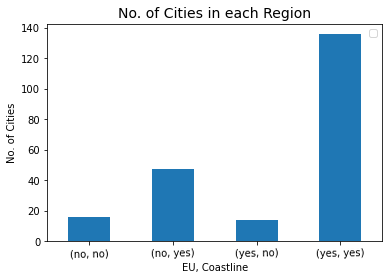

In [52]:
#Prob1.V.1
#rcdf.plot(kind = 'bar', legend=False)
axis = rcdf.plot(figsize=(6,4),kind='bar',rot=1)
axis.set_title('No. of Cities in each Region',fontsize=14)
axis.set_xlabel('EU, Coastline')
axis.set_ylabel('No. of Cities')
axis.legend('') 

## 1.2.2: Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

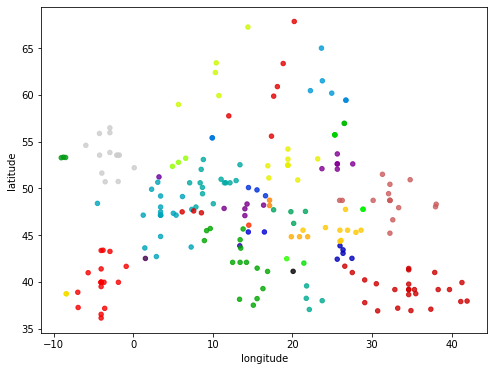

In [53]:
#Prob.1.V.2.
colors = [list(df.country.unique()).index(i)+1 for i in df['country']]
df.plot(figsize=(8,6), kind='scatter',x='longitude',y='latitude', alpha=.8, c = colors, cmap = plt.get_cmap('nipy_spectral'))


## 1.2.3: The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

array([[<AxesSubplot:title={'center':'population'}>]], dtype=object)

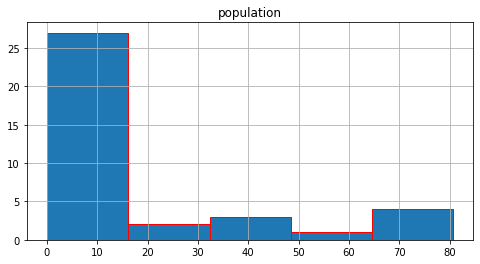

In [54]:
#Prob.1.V.3.
df_pop = df[['country', 'population']].drop_duplicates('country').reset_index()[['country', 'population']]
df_pop.hist(bins=5, figsize=(8,4), edgecolor = 'red')

## 1.2.4: Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

In [55]:
#Prob.1.V.4.
def set_color(temp):
    if temp > 10:
        col = 'red'
    elif temp < 6:
        col = 'blue'
    else:
        col = 'orange'
    return col

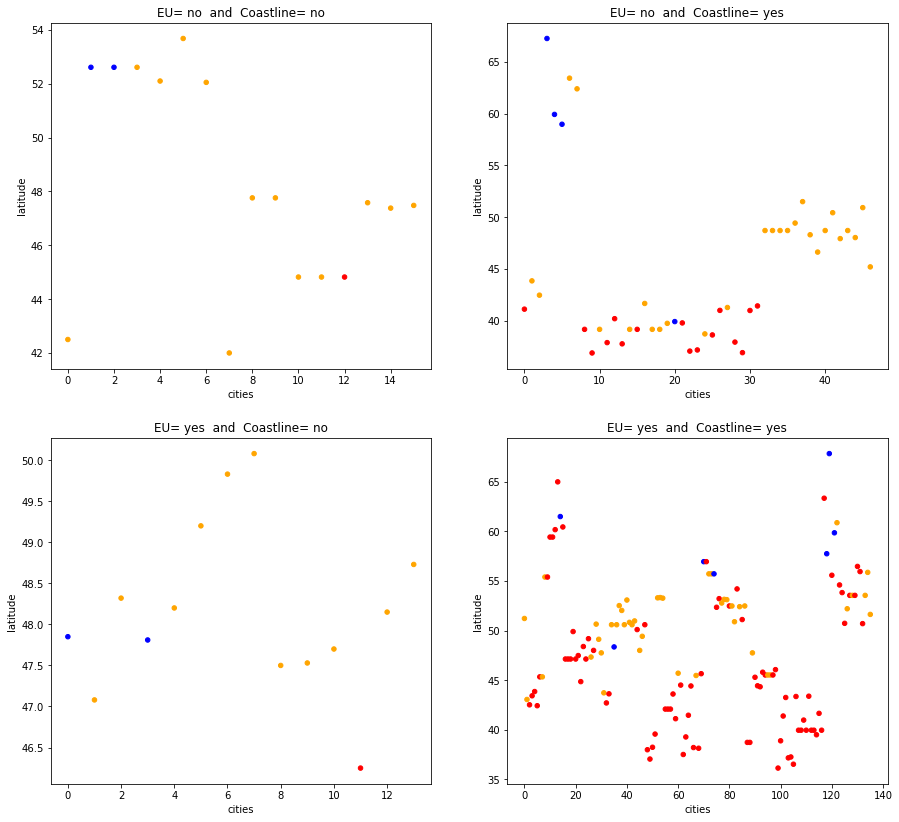

In [56]:
grouped = df.groupby(['EU', 'coastline'])
fig, axes = plt.subplots(2,2, figsize=(15,14))
for (region, group), ax in zip(grouped, axes.flatten()):
    colors = [set_color(i) for i in list(group.temperature)]
    group['cities'] = np.array([j for j in range(len(group['city']))])
    group['colors'] = df['temperature'].apply(lambda x: set_color(x))
    tt = 'EU= '+region[0] + '  ' + 'and'+ '  ' + 'Coastline= ' + region[1]
    group.plot(x='cities', y='latitude', kind='scatter', ax=ax, color = colors, title = tt)